<a href="https://colab.research.google.com/github/anjali88/Data-Science/blob/master/DL_GAN_Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Analysis imports
from pandas.plotting import lag_plot
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas import concat

# Modelling imports
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
# Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.
# The input to Prophet is always a dataframe with two columns: ds and y. 
# The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. 
# The y column must be numeric, and represents the measurement we wish to forecast.

from fbprophet import Prophet

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout

Using TensorFlow backend.


In [4]:
from google.colab import files
uploaded = files.upload()

Saving Data_Test.xlsx to Data_Test.xlsx


In [6]:
import io
data = pd.read_excel(io.BytesIO(uploaded['Data_Test.xlsx']), index_col="Date",parse_dates=True)
print(data)
# if we want to know what sort of detail is provided with this dataset, we can call .keys()
data.keys()

                            Company Symbol  ...  Closeprice  Refprice
Date                                        ...                      
1997-10-16                ALRO S.A.    ALR  ...       6.750     6.750
1997-10-17                ALRO S.A.    ALR  ...       5.950     5.950
1997-10-20                ALRO S.A.    ALR  ...       5.700     5.700
1997-10-21                ALRO S.A.    ALR  ...       5.550     5.550
1997-10-22                ALRO S.A.    ALR  ...       5.400     5.400
...                             ...    ...  ...         ...       ...
2019-07-03  BANCA TRANSILVANIA S.A.    TLV  ...       2.045     2.045
2019-08-03  BANCA TRANSILVANIA S.A.    TLV  ...       2.055     2.055
2019-11-03  BANCA TRANSILVANIA S.A.    TLV  ...       2.090     2.090
2019-12-03  BANCA TRANSILVANIA S.A.    TLV  ...       2.080     2.080
2019-03-13  BANCA TRANSILVANIA S.A.    TLV  ...       2.050     2.050

[91801 rows x 11 columns]


Index(['Company', 'Symbol', 'NoTransaction', 'Noshares', 'ValueTransaction',
       'Minprice', 'Medprice', 'Maxprice', 'Openprice', 'Closeprice',
       'Refprice'],
      dtype='object')

In [7]:
import seaborn as sns
from sklearn import metrics
print(data.describe())

       NoTransaction      Noshares  ...    Closeprice     Refprice
count   91801.000000  9.180100e+04  ...  91801.000000  91801.00000
mean      118.650418  1.300219e+06  ...     14.389024     14.38904
std       166.352363  9.269568e+06  ...     48.540528     48.54053
min         1.000000  0.000000e+00  ...      0.004400      0.00440
25%        18.000000  1.361000e+04  ...      0.229000      0.22900
50%        61.000000  1.050000e+05  ...      0.735000      0.73500
75%       152.000000  7.220000e+05  ...      2.560000      2.56000
max      5638.000000  2.194961e+09  ...    470.000000    470.00000

[8 rows x 9 columns]


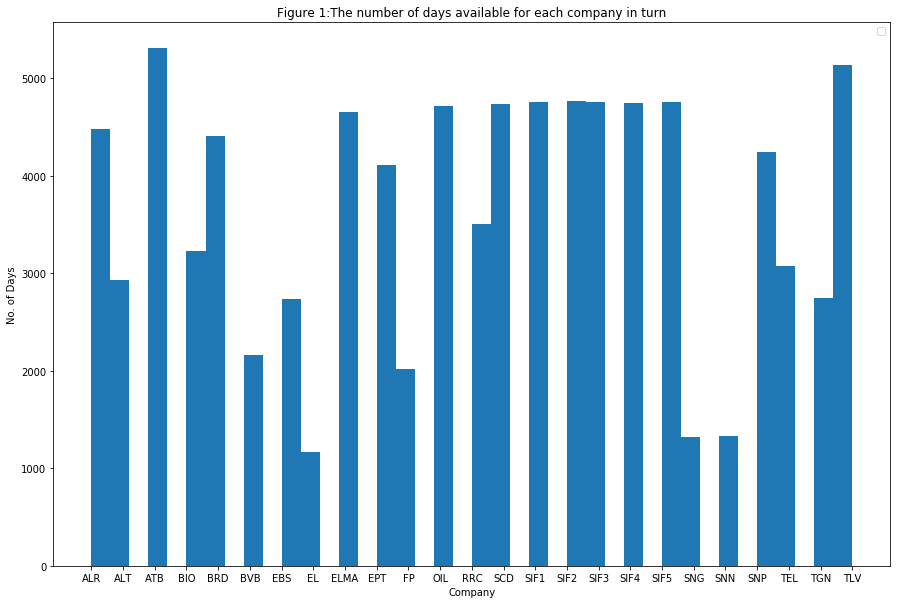

In [14]:
plt.figure(figsize=(15,10))
plt.hist(data['Symbol'],bins=40)
plt.xlabel('Company')
plt.ylabel('No. of Days')
plt.title('Figure 1:The number of days available for each company in turn')
plt.legend()
plt.show()


In [23]:
print('There are {} number of records  in the dataset.'.format(data.shape))

There are (91801, 11) number of records  in the dataset.


In [0]:
plt.figure(figsize=(10,15))
plt.plot(data['Closeprice'].format())
plt.xlabel('Dates')
plt.ylabel('Company')
plt.title('Figure 2:The close prices on the vertical axes along the recorded period on the horizontal ones for each company in turn')
plt.legend()
plt.show()

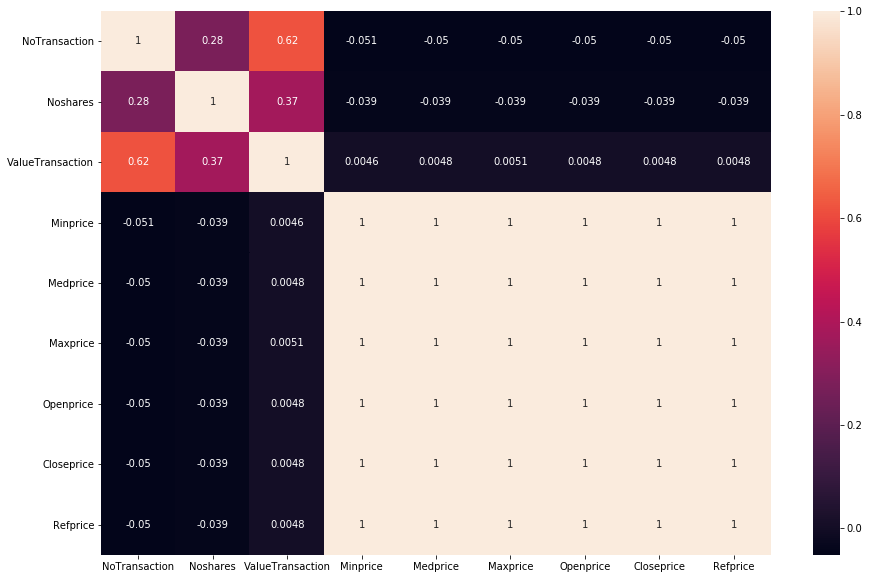

In [9]:
import seaborn as sns
# first we compute the correlation
corr = data.corr(method='pearson')
# and plot our figure size
plt.figure(figsize = (15, 10))
# and use seaborn to fill this figure with a heatmap
sns.heatmap(corr, annot = True)